# Indroduction

Une digue est un petit barrage permettant de retenir une étendue d’eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable.

L'objecif de ce mini-projet est de calculer numériquement les forces appliquées à une digue de forme arbitraire.

## Modèlisation

### Caractéristiques de la digues

#### La digue que nous allons modéliser est un bloc de béton posé sur le sol rocheux qui retient d'un côté une masse d'eau et de l'autre coté est exposée à l'air.

* Masse volumique du béton:$\rho_{beton}$=3000 kg/m$^3$

* Coefficient de friction statique béton - roche: $\mu$=0.5

* Hauteur de la masse d'eau: $H$=10m

### Modèle utilisé

On se place en 2D ce qui signifie que la digue est de longueur unitaire suivant l'axe perpendiculaire au sol.

On considère une digue de forme arbitraire, donc on modélisera les pentes côté air et côté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$ (schéma ci-dessous).


![DigueSchema.png](./DigueSchema.png)

On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

Les fonctions modélisées sont monotones.

Expression des courbes:

$$
f_{eau}(y) = \frac{x_a}{H}.(y-H)
$$
$$
f_{air}(y)=-\frac{x_a}{H}.(y-H)
$$

## Outils physiques pour résoudre le problème

### Bilan des forces sur la digue

* Poid de la digue: $P_{digue}$=$-$$M_{beton}$*$g$


Accélèration de la pesanteur: $g$=9.81 m/s$^-2$

* Réaction du sol: $R$=$N$+$T$

$T$ la force de frottement telle que $T$$ \leq $$\mu$*$N$

* Force de pression hydrostatique: $F_{P_{eau}}$=$P{_{eau}}$*$S$*$n$

-$P{_{eau}}$=$\rho_{eau}$*$g$*($H$-$y$)+$P{_0}$

-$P{_0}$ la pression atmosphérique exercée sur la digue

-$S$ la surface

-$\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x}$ un vecteur unitaire ayant des composantes selon x et y

### Equations d'équilibre statique de la digue

- $P_{eau}$+$N$+$T$+$F_{P_{eau}}$=0

### On affiche les courbes représantant la digue

#### On import les biliothèques utiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

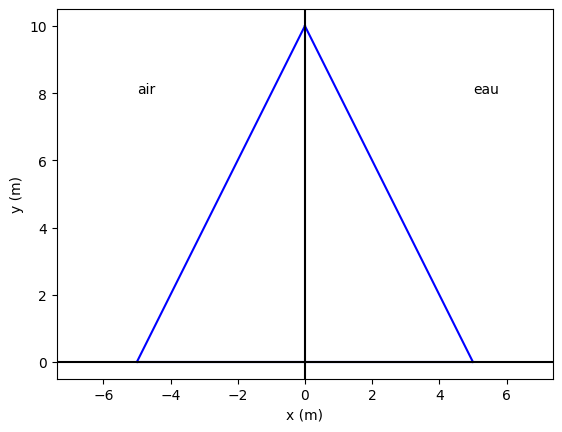

In [2]:
H = 10
xa = -5
xe = +5

# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  (y - H) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

### Précisions sur la force de pression

La force de pression écrite plus haut est en réalité pas tout à fait exacte.

En effet, les forces de pression s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$

Donc pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini comme l'angle entre la tangente en un point et l'axe des abscisses :
$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

# Résolution du projet

## Etude des digues en pente droite

### On calcule le volume de la digue par intégration de la largeur de la digue en fonction de $y$

#### Valeurs numériques utilisées

In [3]:
L=1 #m
H=10 #m

xa = -5
xe = 5
x0=0

g=9.81 #m/s^2
rho_beton=3000 #kg/m^3
rho_eau=1000 #kg/m^3

#### Expression de la pression exercée  sur la digue par l'eau

In [4]:
#Selon x   # ici changement
def P_x(y):
    return rho_eau*g*(H-y)

#Selon y
def P_y(y):
    f_prime=-xa/H
    return rho_eau*g*(H-y)*f_prime

In [5]:
#Question a

# Calcul du pas d'intégration 
n = 1000 # Nombre de pas
Delta_y = (xe - xa) / n

# Initialisation de la somme à zéro
surface_apro = 0 

# On ajoute ensuite chaque terme de la somme par une boucle for
for i in range(n):
    # Valeur de la fonction en (y=a + i * Delta_y)
    f_yi = ((xa + i * Delta_y)-H)*xa/H
    # Aire approximative sous la courbe entre (xa + i * Delta_y) et (xa + (i + 1) * Delta_y)
    aire = f_yi * Delta_y
    # Somme des aires
    surface_apro = surface_apro + aire

print("Surface calculée numériquement: {:.3f}".format(surface_apro),'m^2')
    

#Pour le volume il suffit de multiplier les résultats par la longueur unitaire L de la digue suivant  𝑧
volume_apro=surface_apro*L
print("Volume calculé numériquement: {:.3f}".format(volume_apro),'m^3')



Surface calculée numériquement: 50.025 m^2
Volume calculé numériquement: 50.025 m^3


#### On le compare avec le calcul analytique

In [6]:
#On calcule le résultat analytique pour comparer 

##On intègre l'équation feau(y)=(y-H)*xa/H de 0 à H
## On multiplie cette intégrale par deux car le contour total de la digue n'obéit pas à une même fonction: celle du côté négatif est l'opposée de celle du côté positif
surface_ana = 2*(-H*xa/2)
        
print('Surface calculer analytiquement \t', surface_ana,'m^2')

volume_ana=surface_ana*L
print('Volume calculé analytiquement \t', volume_ana,'m^3')

Surface calculer analytiquement 	 50.0 m^2
Volume calculé analytiquement 	 50.0 m^3


On remarque que les résultats sont identiques à 0,025 m$^3$ près.
On peut donc les considérer comme identiques pour le reste du problème.
On utilisera pour le volume la valeur du volume calculée numériquement pour simplifier les calcules (50 est une valeur entière).

In [7]:
volume_digue=50

#### On peut alors déduire la force de gravité exercée sur la digue $P_{digue}$=$-$$M_{beton}$*$g$

In [8]:
M_beton=rho_beton*volume_digue

P_digue=M_beton*g

print("La force de gravité exercée sur la digue: P_digue={:.0f}".format(P_digue),"N")

La force de gravité exercée sur la digue: P_digue=1471500 N


#### On calcule la résultante vectorielle (il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau.

In [11]:
#Question b

# Méthode des trapèzes
n = 1000
def Inttrap(f, a, b, n):
    deltax = (b - a) / n
    outputx = 0 # Initialisation de la somme à zéro
    for i in range(n):
        outputx = outputx + (f(a + i * deltax) + f(a + (i + 1) * deltax)) * deltax / 2
    return outputx

F_x_eau=Inttrap(P_x, x0, H, n)
F_y_eau=Inttrap(P_y, x0, H, n)
resultante=np.sqrt(F_x_eau**2+F_y_eau**2)

In [12]:
print("Force de pression exercé par l'eau sur la digue selon x: F_x_eau= {:.0f}".format(F_x_eau),"N")
print("Force de pression exercé par l'eau sur la digue selon y: F_y_eau= {:.0f}".format(F_y_eau),"N")
print("Résultante des forces de pression exercé sur la digue: Résultante= {:.0f}".format(resultante))

Force de pression exercé par l'eau sur la digue selon x: F_x_eau= 490500 N
Force de pression exercé par l'eau sur la digue selon y: F_y_eau= 245250 N
Résultante des forces de pression exercé sur la digue: Résultante= 548396


#### On calcul les composantes normales et tangentielles de la force de réaction du sol

Pour se faire, un suppose que la digue est en équilibre statique translationnel.

D'après le résulatat précédent: - $P_{eau}$+$N$+$T$+$F_{P_{eau}}$=0

On projette sur les axes:

* $N$-$P_{eau}$+$P_y$=0
* $T$-$P_x$=0

Finalement:

* $N$=$P_{eau}$-$P_y$
* $T$=$P_x$

In [13]:
#Question c

N_sol=P_digue-F_y_eau
T_sol=F_x_eau
print("Force normale de réaction du sol: : F_normale_sol= {:.0f}".format(N_sol),"N")
print("Force tangentielle de la réaction du sol: F_tangent_sol= {:.0f}".format(T_sol),"N")

Force normale de réaction du sol: : F_normale_sol= 1226250 N
Force tangentielle de la réaction du sol: F_tangent_sol= 490500 N


#### On regarde si la digue est à l'équilibire

In [14]:
print("Rapport de ces forces:: {:.3f}".format(T_sol/N_sol),"N")

Rapport de ces forces:: 0.400 N


En considérant le coefficient de frottement roche/béton de 0.5, on voit qu'on est en équilibre translationelle car T/N<$\mu$

#### On calcul les composantes normales et tangentielles de la force exercée par l'air sur la digue

In [15]:
#Question d

#On calcul P_air
x_air=np.linspace(0,H,1000)
y_air=fair(x_air)
integrale_air=np.trapz(y_air,x_air)
volume_air=np.fabs(integrale_air*L)
P_air=g*volume_air*rho_beton

print("Le poids de l'air est: P_air= {:.0f}".format(P_air),"N")

Le poids de l'air est: P_air= 735750 N


In [16]:
N_air=P_air
T_air=F_x_eau
print("Force normale exercée par l'air: N_air={:.0f}".format(N_air))
print("Force tangentielles ecercées par l'air: T_air={:.0f}".format(T_air))
print("Rapport de ces forces: {:.3f}".format(T_air/N_air))

Force normale exercée par l'air: N_air=735750
Force tangentielles ecercées par l'air: T_air=490500
Rapport de ces forces: 0.667


On voit que la digue est instable car T/N>$\mu$

#### On calcul les composantes normales et tangentielles de la force exercée par l'eau sur la digue

In [17]:
#Question e

#On calcul P_eau
x_eau=np.linspace(0,H,1001)
y_eau=feau(x_eau)
integrale_eau=np.trapz(y_eau,x_eau)
volume_eau=np.fabs(integrale_eau*L)
P_eau=g*volume_eau*rho_beton
print(P_eau)

735750.0


In [18]:
N_eau=P_eau-F_y_eau
T_eau=F_x_eau
print(N_eau)
print(T_eau)
print(T_eau/N_eau)

490500.0000000003
490499.9999999994
0.9999999999999982


### On considère maintenant le cas des digues convexes

L'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


Sa dérivée est :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

Cette fonction relie les points de coordonées $[x_e,0]$ et $[0,H]$). 
Dans la suite nous prendrons $a=3$.

### On calcule la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique

In [19]:
# On redéfinit les fonctions côté eau et côté air
a = 3
def feau2(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair2(y):
    return (H - y) * xa / H

y = np.linspace(0, H, 1000)

In [20]:
#On calcule le volume de béton

#Côté eau
x_eau2=np.linspace(0,H,1001)
y_eau2=feau2(x_eau2)
integrale_eau2=np.trapz(y_eau2,x_eau2)
volume_eau2=np.fabs(integrale_eau2*L)

#Côté air
x_air=np.linspace(0,H,1001)
y_air=fair(x_air)
integrale_air=np.trapz(y_air,x_air)
volume_air=np.fabs(integrale_air*L)

#Volume total de béton
v_beton=volume_air+volume_eau
print("Le volume total occupé par le beton: {:.0f}".format(v_beton),"m^3")

Le volume total occupé par le beton: 50 m^3


In [21]:
M_beton2=rho_beton*v_beton

P_digue2=M_beton2*g

print("Force de gravité exercée sur la digue: P_digue2= {:.0f}".format(P_digue2),"N")

Force de gravité exercée sur la digue: P_digue2= 1471500 N


In [32]:
#Selon x
def P_x2(y):
    return rho_eau*g*(H-y)

#Selon y
def P_y2(y):
    f_prime2=2*a*y/H**2-(a+xe)/H
    return rho_eau*g*(H-y)*f_prime2

In [33]:
F_x_eau2=Inttrap(P_x2, x0, H, n)
F_y_eau2=Inttrap(P_y2, x0, H, n)

In [34]:
N=P_digue2-F_y_eau2
T=F_x_eau2
print("Force normale de réaction du sol: {:.0f}".format(N),"N")
print("Force tangentielle de la réaction du sol: {:.0f}".format(T),"N")
print("Rapport de ces forces: {:.3f}".format(T/N),"N")

Force normale de réaction du sol: 1765800 N
Force tangentielle de la réaction du sol: 490500 N
Rapport de ces forces: 0.278 N


On remarque que la digue est à l'équilibre car T/N<$\mu$

### On reprends le calcul avec $x_e=6$

In [36]:
xe3=6

def feau3(y):
    return a * (y / H) ** 2 - (a + xe3) * (y / H) + xe3
def fair3(y):
    return (H - y) * xa / H


def P_x3(y):
    return rho_eau*g*(H-y)

#Selon y
def P_y3(y):
    f_prime3=2*a*y/H**2-(a+xe3)/H
    return rho_eau*g*(H-y)*f_prime3

F_x_eau3=Inttrap(P_x3, x0, H, n)
F_y_eau3=Inttrap(P_y3, x0, H, n)

In [37]:
N=P_digue-F_y_eau3
T=F_x_eau3
print("Force normale de réaction du sol: {:.0f}".format(N),"N")
print("Force tangentielle de la réaction du sol: {:.0f}".format(T),"N")
print("Rapport de ces forces: {:.3f}".format(T/N))

Force normale de réaction du sol: 1814850 N
Force tangentielle de la réaction du sol: 490500 N
Rapport de ces forces: 0.270


Je ne compare pas car le résultat du cas de la pente affine avec $x_a=0$ et $x_e=5$ est faux

### On calcule le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$ et on le trace en fonction du volume de la digue

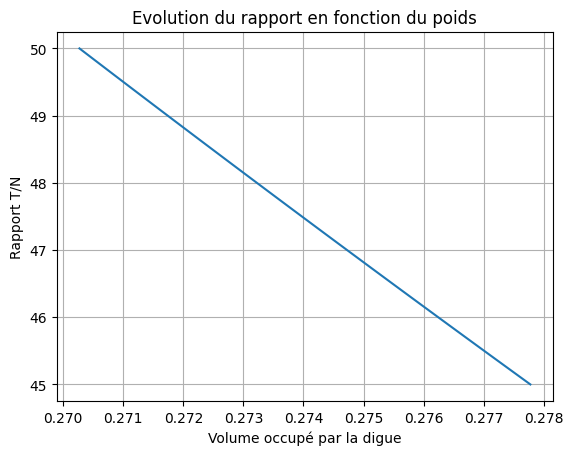

In [51]:
xe4=np.linspace(5,6,100)
volume=[]
rapport=[]
for i in xe4:
    def feau4(y):
        return a * (y / H) ** 2 - (a + i) * (y / H) + i
    def fair4(y):
        return (H - y) * xa / H
    def P_x4(y):
        return rho_eau*g*(H-y)
    def P_y4(y):
        f_prime4=2*a*y/H**2-(a+i)/H
        return rho_eau*g*(H-y)*f_prime4
    F_x_eau4=Inttrap(P_x4, x0, H, n)
    F_y_eau4=Inttrap(P_y4, x0, H, n)
    N4=P_digue-F_y_eau4
    T4=F_x_eau4
    x_eau4=np.linspace(0,H,1001)
    y_eau4=feau4(x_eau2)
    integrale_eau4=np.trapz(y_eau4,x_eau4)
    volume_eau4=np.fabs(integrale_eau4*L)
    x_air4=np.linspace(0,H,1001)
    y_air4=fair4(x_air4)
    integrale_air4=np.trapz(y_air4,x_air4)
    volume_air4=np.fabs(integrale_air4*L)
    v_beton=volume_air4+volume_eau4
    rapport.append(T4/N4)
    volume.append(v_beton)
    
#print(rapport)
#print(poids)

plt.plot(rapport,volume)
plt.xlabel("Volume occupé par la digue")
plt.ylabel("Rapport T/N")
plt.title("Evolution du rapport en fonction du poids")
plt.grid()

### On détermine graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

Je ne réponds pas à cette question dû à mes résultats incorrectes